In [173]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [174]:
# bubble sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0,n-i-1):
            if arr[j]>arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [175]:
# selection_sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

In [176]:
# insertion sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key

In [177]:
# quick sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [178]:
# merge sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)
def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

In [179]:
# heap sort
def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)

def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

In [180]:
# counting sort
def counting_sort(arr):
    max_val = max(arr)
    min_val = min(arr)
    range_size = max_val - min_val + 1
    count = [0] * range_size
    output = [0] * len(arr)

    for num in arr:
        count[num - min_val] += 1

    for i in range(1, range_size):
        count[i] += count[i - 1]

    for i in reversed(range(len(arr))):
        output[count[arr[i] - min_val] - 1] = arr[i]
        count[arr[i] - min_val] -= 1

    for i in range(len(arr)):
        arr[i] = output[i]

In [181]:
def counting_sort_for_radix(array, exp, is_str):
    n = len(array)
    count = [0] * (256 if is_str else 10)
    for i in range(n):
        index = ord(array[i][exp]) if is_str else (array[i] // exp) % 10
        count[index] += 1
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    output = [0] * n
    for i in range(n - 1, -1, -1):
        index = ord(array[i][exp]) if is_str else (array[i] // exp) % 10
        output[count[index] - 1] = array[i]
        count[index] -= 1

    for i in range(n):
        array[i] = output[i]

def radix_sort(array, is_str=False):
    if len(array) == 0:
        return

    if is_str:
        max_length = max(len(s) for s in array)
        for exp in range(max_length - 1, -1, -1):
            padded_array = [s.ljust(max_length, '\0') for s in array]
            counting_sort_for_radix(padded_array, exp, True)
            for i in range(len(array)):
                array[i] = padded_array[i].rstrip('\0')
    else:
        max_num = max(array)
        exp = 1
        while max_num // exp > 0:
            counting_sort_for_radix(array, exp, False)
            exp *= 10

In [182]:
# tree sort node class
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

In [183]:
# BST
class BST:
    def __init__(self):
        self.root = None

    def insert(self, root, key):
        if root is None:
            return TreeNode(key)
        if key <= root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        return root

    def inorder(self, root, res):
        if root:
            self.inorder(root.left, res)
            res.append(root.key)
            self.inorder(root.right, res)
# AVL
class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, root, key):
        if not root:
            return TreeNode(key)
        if key <= root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        balance = self.getBalance(root)

        if balance > 1 and key <= root.left.key:
            return self.rightRotate(root)
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)
        if balance > 1 and key > root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
        if balance < -1 and key <= root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)

        return root

    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    def rightRotate(self, y):
        x = y.left
        T3 = x.right
        x.right = y
        y.left = T3
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        return x

    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def inorder(self, root, res):
        if root:
            self.inorder(root.left, res)
            res.append(root.key)
            self.inorder(root.right, res)

In [184]:
# bst sort and avl sort
def bst_sort(arr):
    if not arr:
        return []
    bst = BST()
    for num in arr:
        bst.root = bst.insert(bst.root, num)
    sorted_arr = []
    bst.inorder(bst.root, sorted_arr)
    return sorted_arr

def avl_sort(arr):
    if not arr:
        return []
    avl = AVLTree()
    for num in arr:
        avl.root = avl.insert(avl.root, num)
    sorted_arr = []
    avl.inorder(avl.root, sorted_arr)
    return sorted_arr

In [185]:
# test function, determine whether to modify the array in place
def test_sort(func, in_place=True):
    test_arr = [5, 2, 9, 1, 5, 6]
    sorted_arr = sorted(test_arr)
    arr = test_arr.copy()
    if in_place:
        func(arr)
        result = arr
    else:
        result = func(arr)
    assert result == sorted_arr, f"{func.__name__} didn't sort correctly."

In [186]:
# Testing sorting functions
test_sort(bubble_sort, in_place=True)
test_sort(selection_sort, in_place=True)
test_sort(insertion_sort, in_place=True)
test_sort(quick_sort, in_place=False)
test_sort(merge_sort, in_place=False)
test_sort(heap_sort, in_place=True)
test_sort(radix_sort, in_place=True)
test_sort(counting_sort, in_place=True)
test_sort(bst_sort, in_place=False)
test_sort(avl_sort, in_place=False)

In [187]:
df = pd.read_csv('TDCS_M06A_20231204_080000.csv',header=None)
df = df.iloc[:,[0,1,2,5]]
df.head()

,0,1,2,5
0,31,2023-12-04 08:34:50,01F3640S,7.20
1,32,2023-12-04 08:16:35,01F3185N,20.03
2,31,2023-12-04 08:20:36,01F0578S,13.00
3,31,2023-12-04 08:02:25,03F0498N,19.50
4,31,2023-12-04 08:15:54,01F0467N,25.90


In [188]:
df[0].value_counts()

31    153353
32     53725
42      9901
5       7565
41      3025
Name: 0, dtype: int64

In [169]:
df[1].value_counts()

2023-12-04 08:15:00    98
2023-12-04 08:02:40    97
2023-12-04 08:04:54    91
2023-12-04 08:00:48    91
2023-12-04 08:34:20    90
                       ..
2023-12-04 08:39:01    39
2023-12-04 08:52:56    39
2023-12-04 08:23:15    39
2023-12-04 08:52:26    38
2023-12-04 08:58:54    33
Name: 1, Length: 3600, dtype: int64

In [189]:
df[2].value_counts()

01F3696N    5205
01F3640N    3547
01F0248S    3204
01F3640S    2976
01F0376N    2950
            ... 
03F1022S       1
05F0439S       1
01H0333N       1
03F2709N       1
01F1960S       1
Name: 2, Length: 326, dtype: int64

In [190]:
# VehicleType/DirectionTime_O/GantryID_O/TripLength
from datetime import datetime
VT = np.array(df.iloc[:,0])
DT = np.array(df.iloc[:,1])
DT = [datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in DT]
GID = np.array(df.iloc[:,2])
TL = np.array(df.iloc[:,3])

In [191]:
print('data type of VehicleType is:',type(VT[0]))
print('data type of DirectionTime_O is:',type(DT[0]))
print('data type of GantryID_O is:',type(GID[0]))
print('data type of TripLength is:',type(TL[0]))

data type of VehicleType is: <class 'numpy.int64'>
data type of DirectionTime_O is: <class 'datetime.datetime'>
data type of GantryID_O is: <class 'str'>
data type of TripLength is: <class 'numpy.float64'>


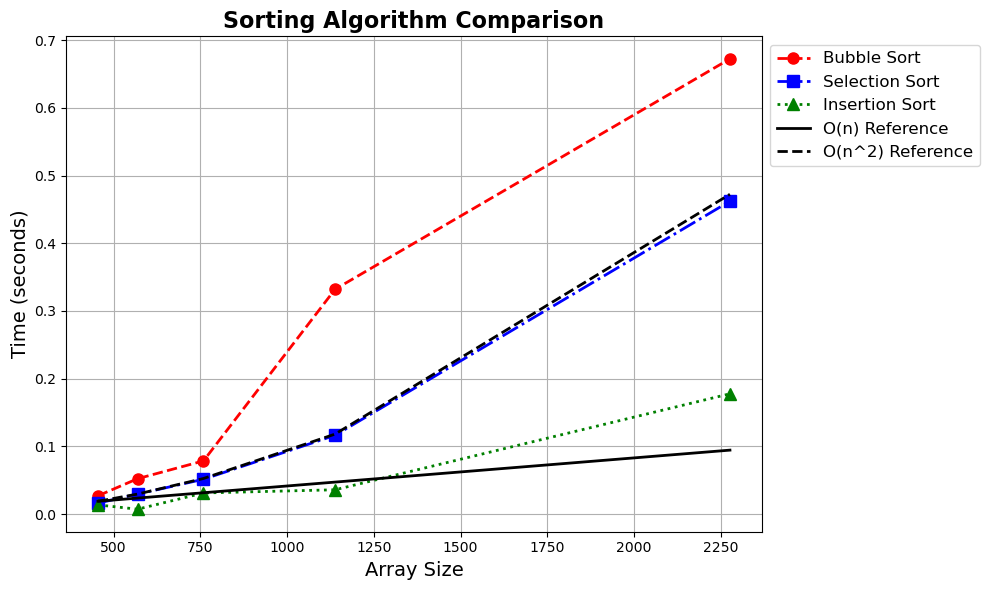

In [195]:
n = len(TL)/100
sizes = [round(n/5),round(n/4),round(n/3),round(n/2),round(n)]
times_bubble = []
times_selection = []
times_insertion = []
times_quick = []
times_merge = []
times_heap = []
times_bst = []
times_avl = []
times_count = []
times_radix = []

for size in sizes:
    arr = VT[0:size]

    # 测试冒泡排序
    arr_bubble = arr.copy()
    start = time.time()
    bubble_sort(arr_bubble)
    end = time.time()
    times_bubble.append(end - start)

    # 测试选择排序
    arr_selection = arr.copy()
    start = time.time()
    selection_sort(arr_selection)
    end = time.time()
    times_selection.append(end - start)

    # 测试插入排序
    arr_insertion = arr.copy()
    start = time.time()
    insertion_sort(arr_insertion)
    end = time.time()
    times_insertion.append(end - start)



t_avg = (times_bubble[0] + times_selection[0] + times_insertion[0]) / 3
k1 = t_avg / sizes[0]
k2 = t_avg / (sizes[0]**2)
# 生成O(n)参考线的y值
y_reference_1 = [k1 * size for size in sizes]
y_reference_2 = [k2 * size**2 for size in sizes]
# 绘制折线图
plt.figure(figsize=(10,6))
plt.plot(sizes, times_bubble, label='Bubble Sort', color='red', linestyle='--', marker='o', linewidth=2, markersize=8)
plt.plot(sizes, times_selection, label='Selection Sort', color='blue', linestyle='-.', marker='s', linewidth=2, markersize=8)
plt.plot(sizes, times_insertion, label='Insertion Sort', color='green', linestyle=':', marker='^', linewidth=2, markersize=8)
plt.plot(sizes, y_reference_1, label='O(n) Reference', color='black', linestyle='-', linewidth=2)
plt.plot(sizes, y_reference_2, label='O(n^2) Reference', color='black', linestyle='--', linewidth=2)
plt.xlabel('Array Size', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Sorting Algorithm Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()